In [2]:
import pandas as pd
import requests
import zipfile
import io
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction import text

In [3]:
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open("SMSSpamCollection") as f:
        df = pd.read_csv(f, sep="\t", names=["label", "text"])


In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:

stop_words = text.ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})


               # Join the filtered words back into a string

In [ ]:
df["clean_text"]

,clean_text
0,jurong point crazy available bugis n great wor...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c say
4,nah dont think goes usf lives
...,...
5567,2nd time tried 2 contact u u won 750 pound pri...
5568,ü b going esplanade fr home
5569,pity mood soany suggestions
5570,guy did bitching acted like id interested buyi...


In [5]:
# Train/test split
X = df["clean_text"]
y = df["label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [8]:
X_train

,clean_text
1978,reply win 100 weekly 2006 fifa world cup held ...
3989,hello sort town dont rush home eating nachos l...
3935,come guoyang n tell u told
4078,hey sathya till dint meet single time saw situ...
4086,orange brings ringtones time chart heroes free...
...,...
3772,hi wlcome did wonder got eaten lion
5191,sorry ill later
5226,prabhaim sorydarealyfrm heart im sory
5390,nt joking seriously told


In [12]:
vectorizer = CountVectorizer()
x_train_bag_of_words = vectorizer.fit_transform(X_train)
x_test_bag_of_words = vectorizer.transform(X_test)

In [13]:
##Build the model

model = MultinomialNB()
model.fit(x_train_bag_of_words,y_train)

MultinomialNB()

In [14]:
##Evaluation
y_pred = model.predict(x_test_bag_of_words)

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
accuracy_score(y_test,y_pred)

0.9874439461883409

In [17]:
from sklearn import metrics

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [19]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

In [20]:
import matplotlib.pyplot as plt

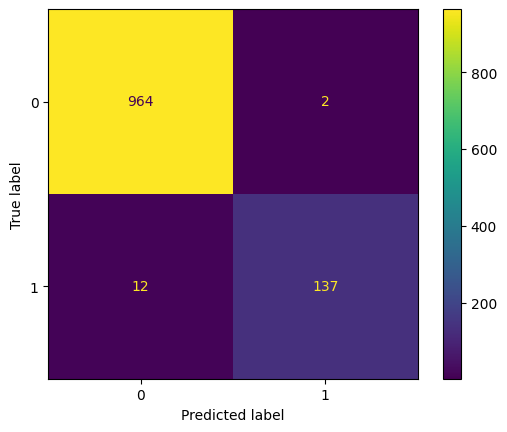

In [21]:
cm_display.plot()
plt.show()

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



<Axes: xlabel='label'>

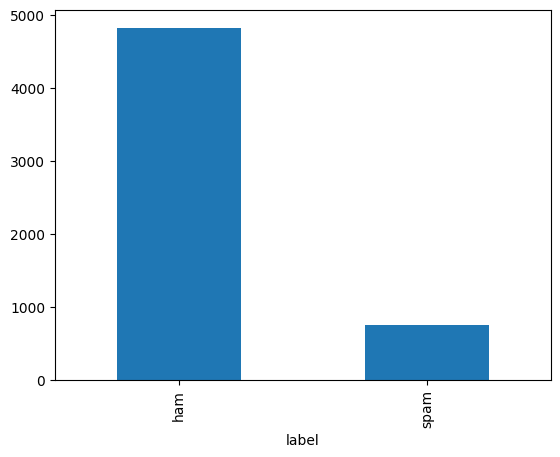

In [24]:
df['label'].value_counts().plot(kind='bar')

In [27]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [26]:
##Build model for tfidf vectorizer
model = MultinomialNB()
model.fit(x_train_tfidf,y_train)

MultinomialNB()

In [29]:
y_pred = model.predict(x_test_tfidf)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [32]:
accuracy_score(y_test,y_pred)

0.968609865470852

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [34]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

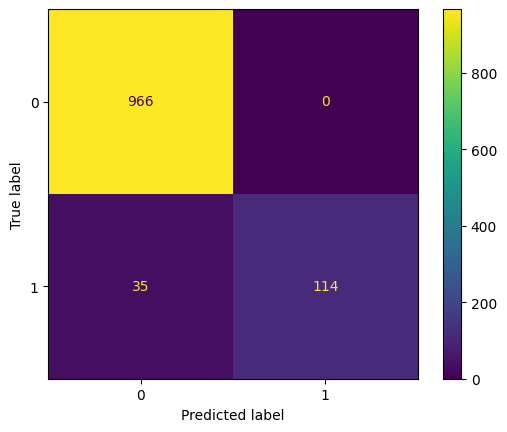

In [35]:
cm_display.plot()
plt.show()